In [6]:
import cv2
import math
import numpy as np
from scipy.signal import convolve2d
from matplotlib import pyplot as plt

# edge detection

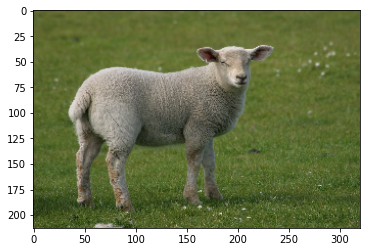

In [2]:
img = cv2.imread('sheep.png')[:,:,::-1]
plt.imshow(img)

# sobel filter

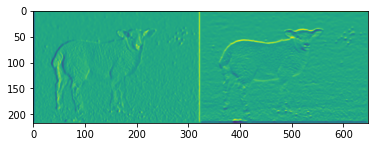

In [3]:
kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) / 4
ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]) / 4

grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur = convolve2d(grey, np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9)

dx = convolve2d(blur, kx)
dy = convolve2d(blur, ky)

x = np.concatenate((dx, dy), axis=1)

plt.imshow(x)

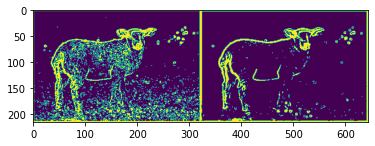

In [4]:
kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) / 4
ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]) / 4

grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur = convolve2d(grey, np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9)

dx_grey = convolve2d(grey, kx)
dy_grey = convolve2d(grey, ky)

dx_blur = convolve2d(blur, kx)
dy_blur = convolve2d(blur, ky)

dx = np.concatenate((dx_grey, dx_blur[1:-1, 1:-1]), axis=1)
dy = np.concatenate((dy_grey, dy_blur[1:-1, 1:-1]), axis=1)

x = np.sqrt(dx**2 + dy**2) > 20
plt.imshow(x)

# canny filter

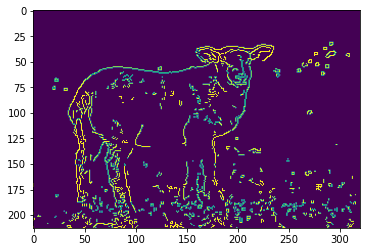

In [5]:
img = cv2.imread('sheep.png')
edges = cv2.Canny(img, 150, 220)
plt.imshow(edges)